# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the training set

In [40]:
dataset_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [42]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [45]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [47]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [48]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [49]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [50]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [51]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [52]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 17ms/step - loss: 0.0808
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 8/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 1s 15ms/step - loss: 0.0064
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0038
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [53]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [54]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

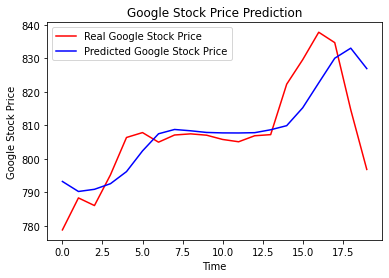

In [55]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()